In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
from PIL import Image
import numpy as np
import os


X = []
y = []

base_path='/content/drive/MyDrive/ICAR_Coco'
source_path=base_path

for child in os.listdir(source_path)[:]:
    count_child=0
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path)[:50]:
            count_child+=1
            X_i = Image.open(os.path.join(sub_path, data_file))
            X_i = np.array(X_i.resize((120,120))) / 255.0
            X.append(X_i)
            y.append(child)
        print(f"{child},no of files,{count_child}")
print(np.shape(X))
print(y)

Healthy,no of files,28
ManganeseDef,no of files,50
MagnesiumDef,no of files,50
(128, 120, 120, 3)
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', 'ManganeseDef', '

In [4]:
from sklearn.preprocessing import LabelBinarizer

# Assuming your original labels are in the variable 'y'
encoder = LabelBinarizer()
y1 = encoder.fit_transform(y)


[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 

In [3]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Assuming you have X and y defined somewhere before this code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y1),
                                                    test_size=0.2, random_state=42)

# Define the CNN model
cnnModel = models.Sequential()

cnnModel.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(120, 120, 3)))
cnnModel.add(layers.Conv2D(64, (3, 3), activation="relu"))
cnnModel.add(layers.MaxPooling2D((2, 2)))
cnnModel.add(layers.Conv2D(128, (3, 3), activation="relu"))
cnnModel.add(layers.Conv2D(128, (3, 3), activation="relu"))
cnnModel.add(layers.Flatten())

cnnModel.add(layers.Dense(64, activation="relu"))
cnnModel.add(layers.Dense(32, activation="relu"))
cnnModel.add(layers.Dense(3, activation="sigmoid"))

cnnModel.summary()

# Compile the model
cnnModel.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
cnnModel.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
testLoss, testAccuracy = cnnModel.evaluate(X_test, y_test)
print("Test Accuracy:", testAccuracy)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 116, 116, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 58, 58, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 54, 54, 128)       147584    
                                                                 
 flatten (Flatten)           (None, 373248)            0         
                                                        

In [6]:
cnnModel.save('coco-3class.h5')

In [8]:
y_pred_prob = cnnModel.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
print(y_pred)

1/1 [==============================] - 1s 1s/step
[2 2 0 2 1 2 2 1 1 0 1 0 2 0 1 1 2 1 1 1 0 0 1 0 1 2]


In [23]:

loss, accuracy = cnnModel.evaluate(X_test, y_test)
metrics = cnnModel.metrics_names
results = {metric: value for metric, value in zip(metrics, [loss] + [accuracy])}
print("Loss:", results["loss"])
print("Accuracy:", results["accuracy"])



2/2 [==============================] - 1s 167ms/step - loss: 0.2511 - accuracy: 0.9149
Loss: 0.2510806918144226
Accuracy: 0.914893627166748


In [13]:
# Assuming you have the classes used for one-hot encoding
class_labels = encoder.classes_

# Get the class labels for y_pred
y_pred_labels = class_labels[y_pred]


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
confusion = confusion_matrix(y_test_labels, y_pred_labels)
print("Confusion Matrix:")
print(confusion)

# Classification Report
report = classification_report(y_test_labels, y_pred_labels)
print("Classification Report:")
print(report)


Confusion Matrix:
[[ 7  0  0]
 [ 0 11  0]
 [ 0  0  8]]
Classification Report:
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00         7
MagnesiumDef       1.00      1.00      1.00        11
ManganeseDef       1.00      1.00      1.00         8

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00         7
MagnesiumDef       1.00      1.00      1.00        11
ManganeseDef       1.00      1.00      1.00         8

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



<Axes: >

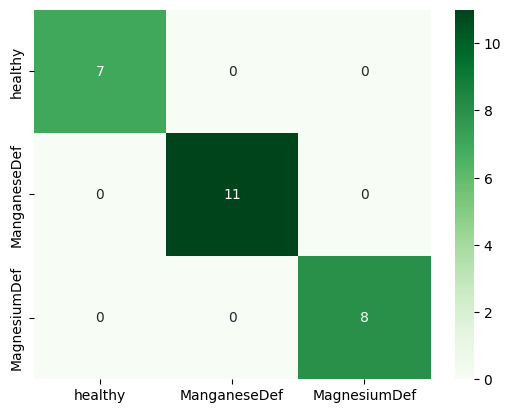

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

#np.argmax(y_test.values, axis=1)
print(classification_report(y_test_labels,y_pred_labels))

cm = confusion_matrix(y_test_labels,y_pred_labels)
sns.heatmap(cm,cmap='Greens', annot=True, fmt='d',xticklabels = [ 'healthy', 'ManganeseDef', 'MagnesiumDef'],yticklabels = ['healthy', 'ManganeseDef', 'MagnesiumDef'])

#sns.heatmap(cm,cmap='Greens', annot=True,fmt='d', xticklabels = [ 'erlang','exponential', 'gaussian', 'lognormal', 'poisson', 'rayleigh', 'saltpepper', 'speckle','uniform'],yticklabels = ['erlang','exponential', 'gaussian', 'lognormal', 'poisson', 'rayleigh', 'saltpepper', 'speckle','uniform'])


In [23]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

pred_prob = cnnModel.predict(X_test)
pr1, tpr1, thresh1 = roc_curve(y_test, pred_prob, pos_label=1)


random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.plot(pr1, tpr1, linestyle='--', label='CNN')
plt.plot(p_fpr, p_tpr, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

1/1 [==============================] - 1s 1s/step


ValueError: ignored

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/